In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...


In [5]:
%pwd

'/teamspace/studios/this_studio'

In [6]:
%cd yolov5

/teamspace/studios/this_studio/yolov5


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)

import torch
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


Setup complete. Using torch 2.2.1+cu121 _CudaDeviceProperties(name='NVIDIA A10G', major=8, minor=6, total_memory=22723MB, multi_processor_count=80)


In [5]:
pwd


'/teamspace/studios/this_studio/yolov5'

In [6]:
%cd ..

/teamspace/studios/this_studio


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 105.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [8]:
from roboflow import Roboflow
rf = Roboflow(api_key="zC5JFsZiedy3QbHfU9e4")
project = rf.workspace("wensuki-wxugk").project("vehicle-accident-detection-jtx9t")
version = project.version(3)
dataset = version.download("yolov5")

loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to Vehicle-Accident-Detection-3 in yolov5pytorch:: 100%|██████████| 19586/19586 [00:04<00:00, 4539.56it/s]


In [9]:
data_yaml = "Vehicle-Accident-Detection-3/data.yaml"

In [10]:
import yaml
with open(data_yaml, 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [12]:
pwd

'/teamspace/studios/this_studio'

In [18]:
pwd

'/teamspace/studios/this_studio'

In [20]:
%cat yolov5/models/yolov5s.yaml

# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 

In [21]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [22]:
%%writetemplate yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [23]:
pwd

'/teamspace/studios/this_studio'

In [24]:
%cd yolov5/

/teamspace/studios/this_studio/yolov5


using dhist requires you to install the `pickleshare` library.


In [26]:
import yaml

# Path to your data.yaml file
yaml_file = '../Vehicle-Accident-Detection-3/data.yaml'

# Read the original YAML file
with open(yaml_file, 'r') as file:
    data = yaml.safe_load(file)

# Update the paths
data['train'] = '../Vehicle-Accident-Detection-3/train/images'
data['val'] = '../Vehicle-Accident-Detection-3/valid/images'
data['test'] = '../Vehicle-Accident-Detection-3/test/images'

# Write the updated YAML file
with open(yaml_file, 'w') as file:
    yaml.safe_dump(data, file)

print("Paths updated successfully.")


Paths updated successfully.


In [27]:
!python train.py --img 640 --batch 16 --epochs 100 --data ../Vehicle-Accident-Detection-3/data.yaml --cfg ./models/custom_yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results --cache

train: weights=yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=../Vehicle-Accident-Detection-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA A10G, 22724MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, war

In [8]:
pwd

'/teamspace/studios/this_studio/yolov5'

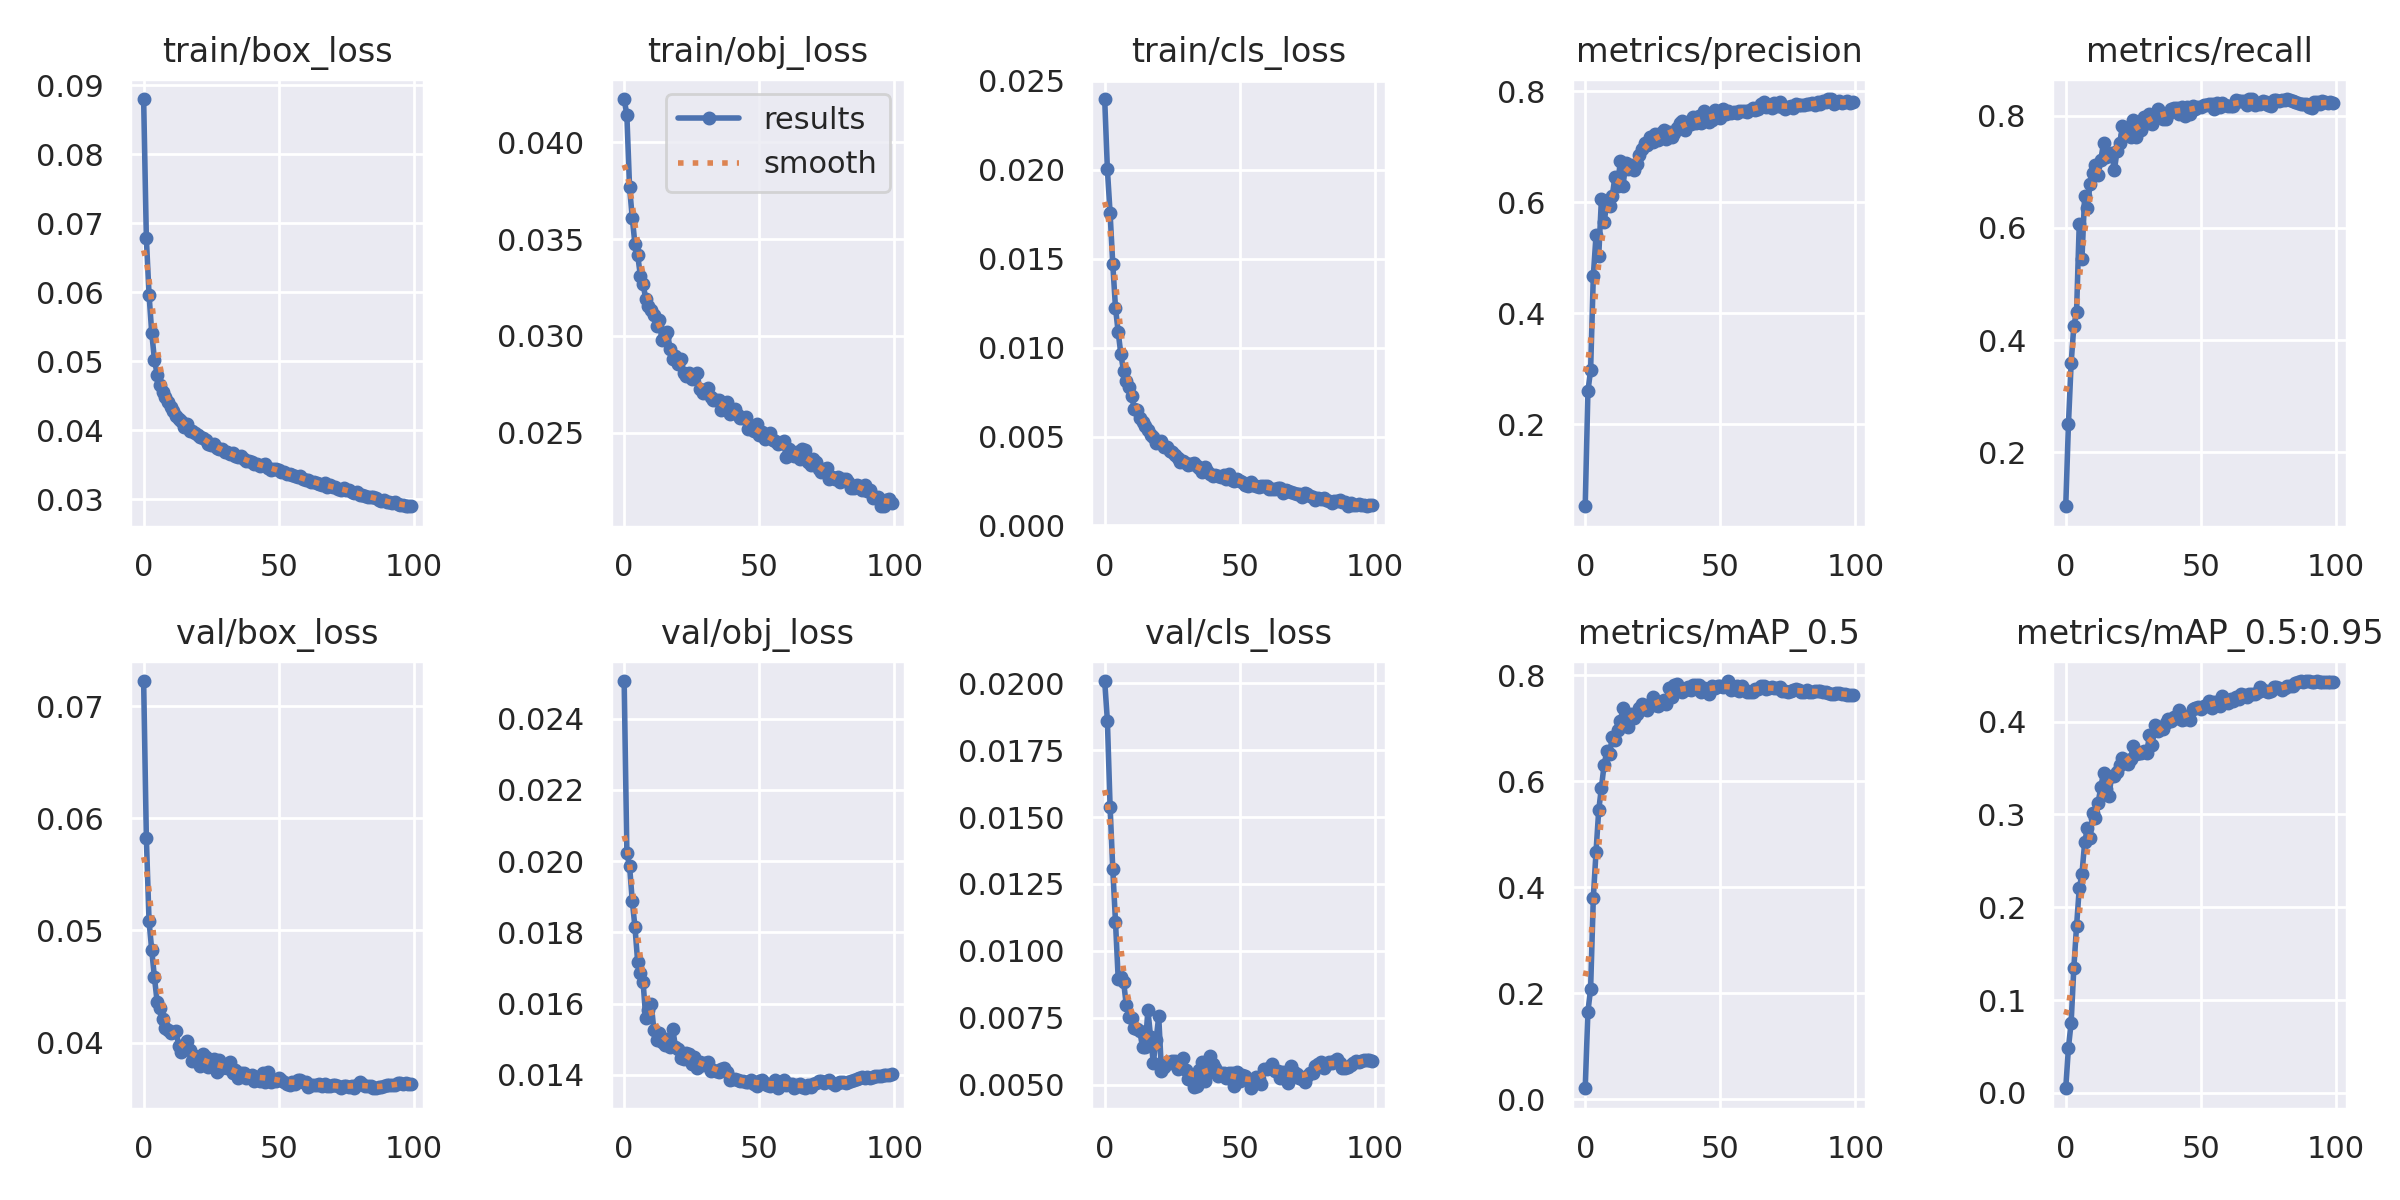

In [11]:
from utils.plots import plot_results  # plot results.txt as results.png
from IPython.display import Image

Image(filename='./runs/train/yolov5s_results2/results.png', width=1000)  # view results.png

GROUND TRUTH TRAINING DATA:


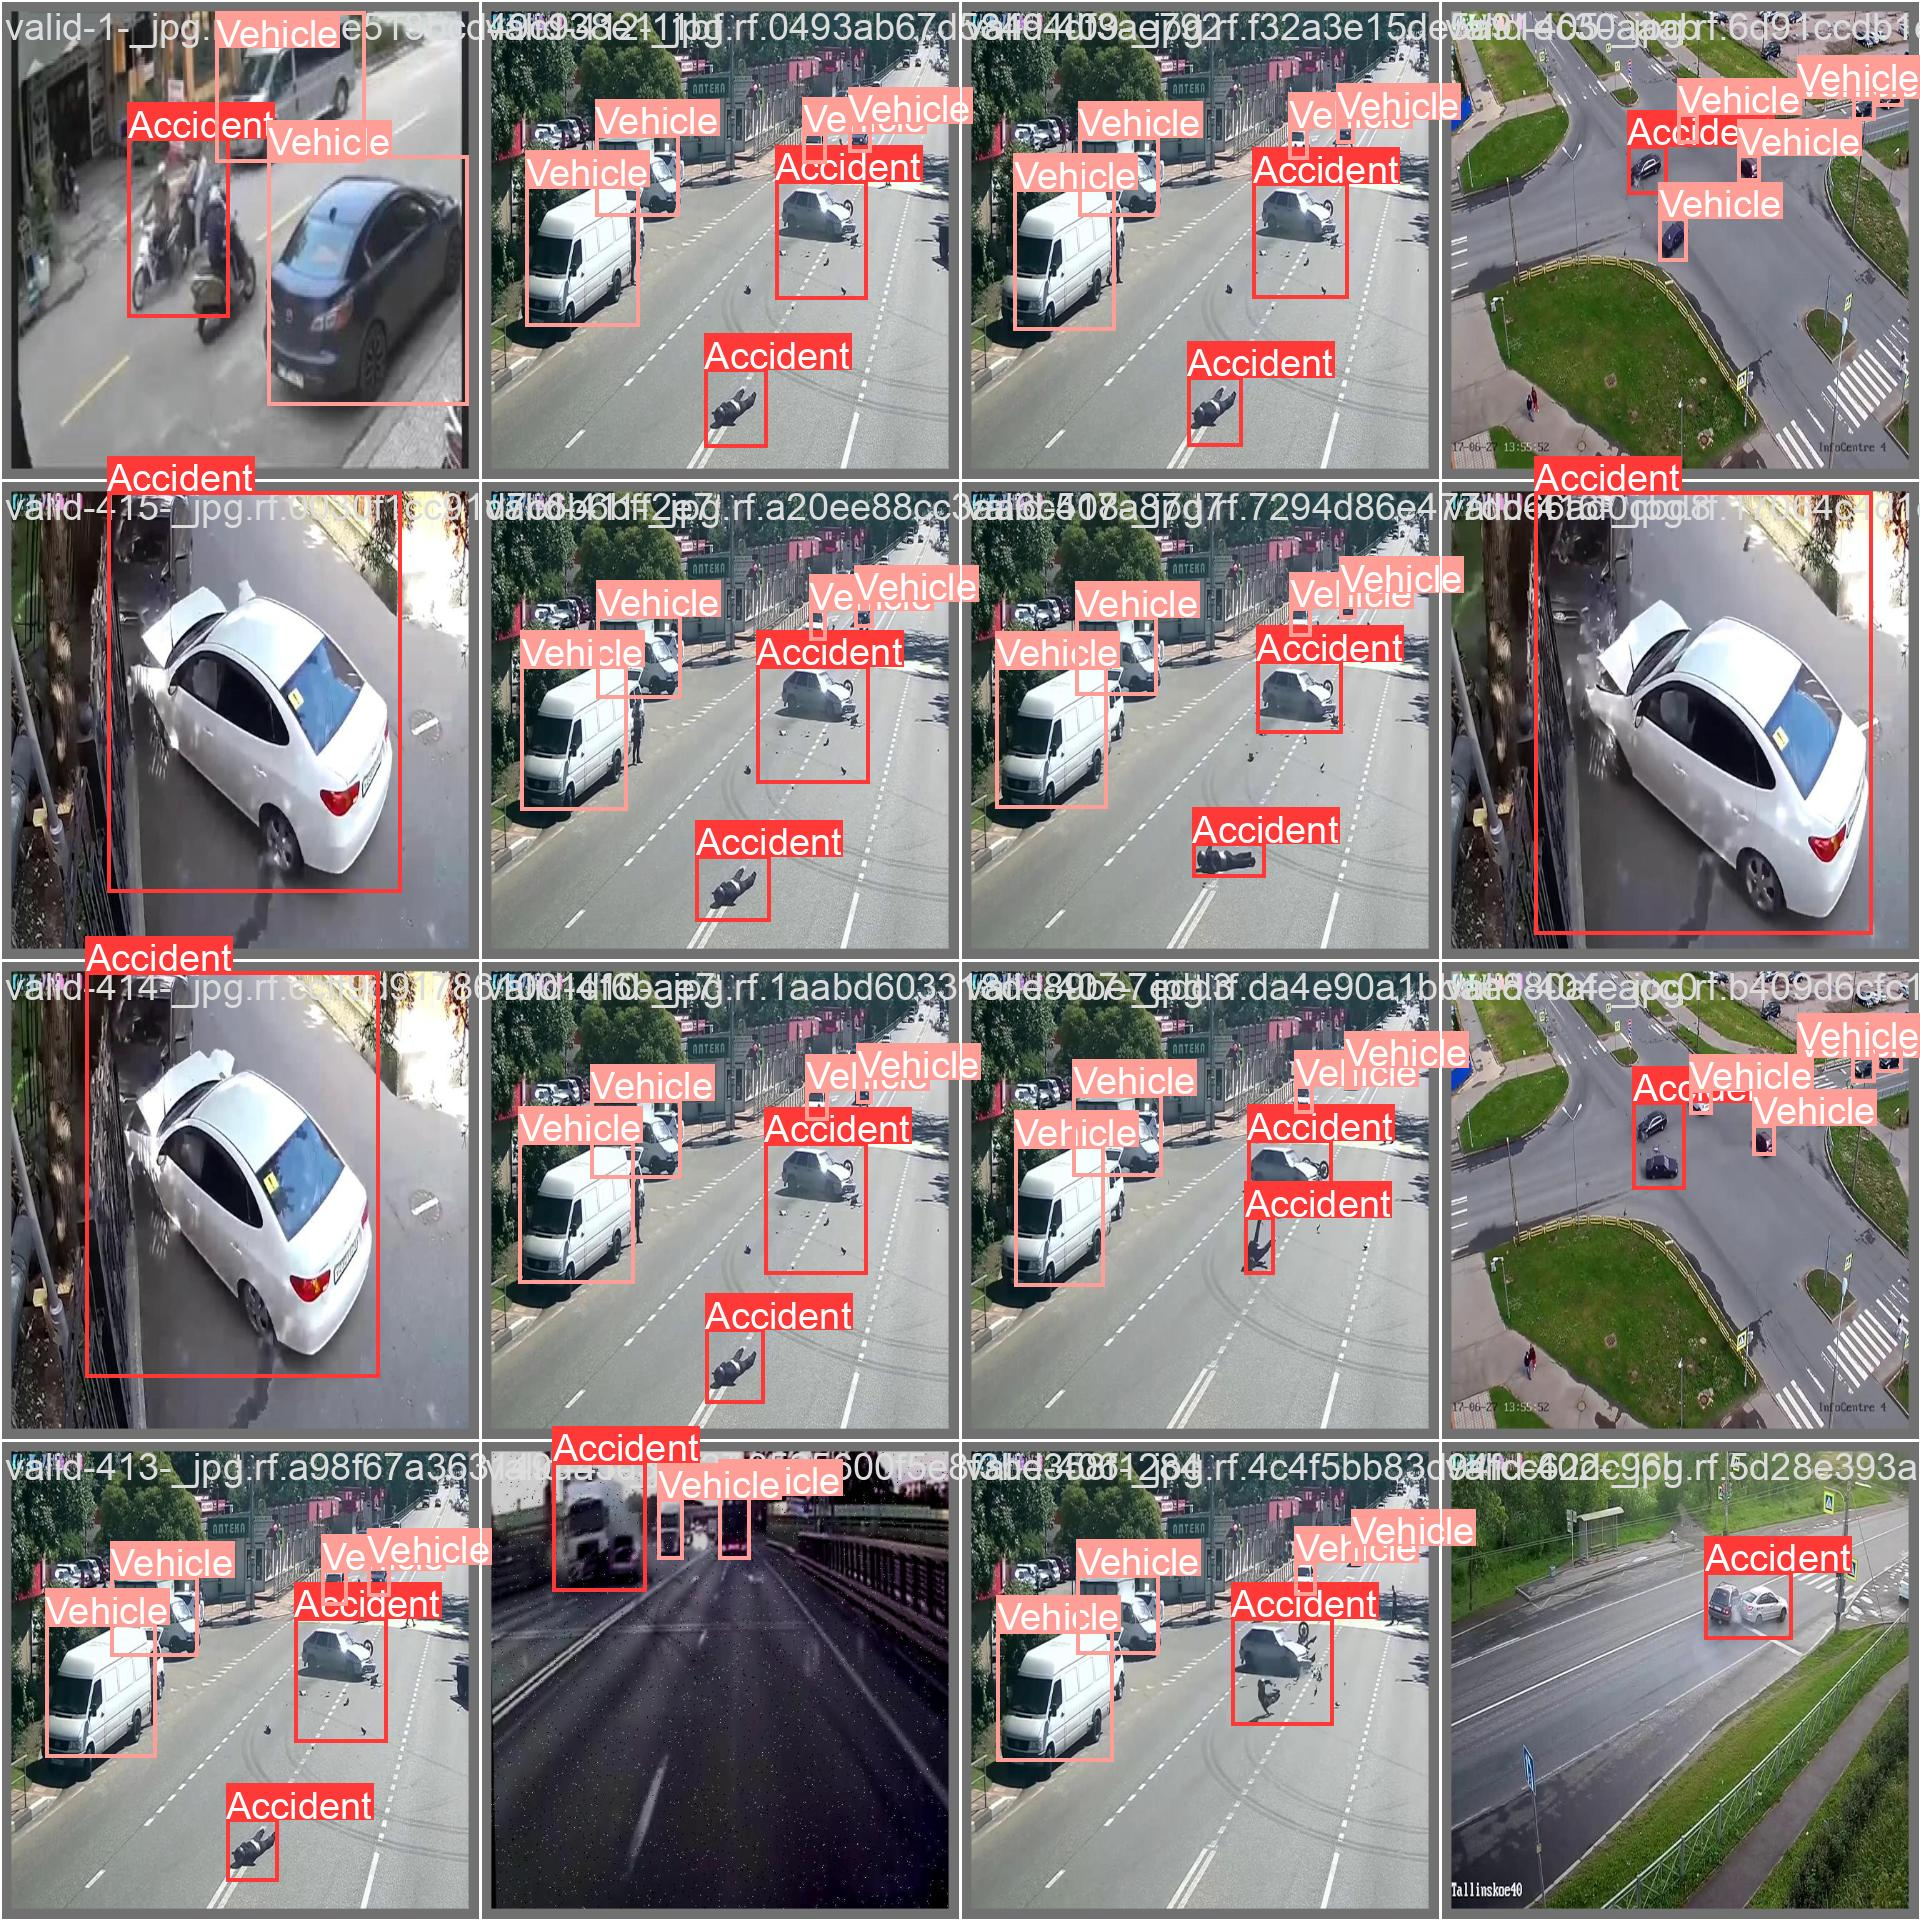

In [12]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='./runs/train/yolov5s_results2/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


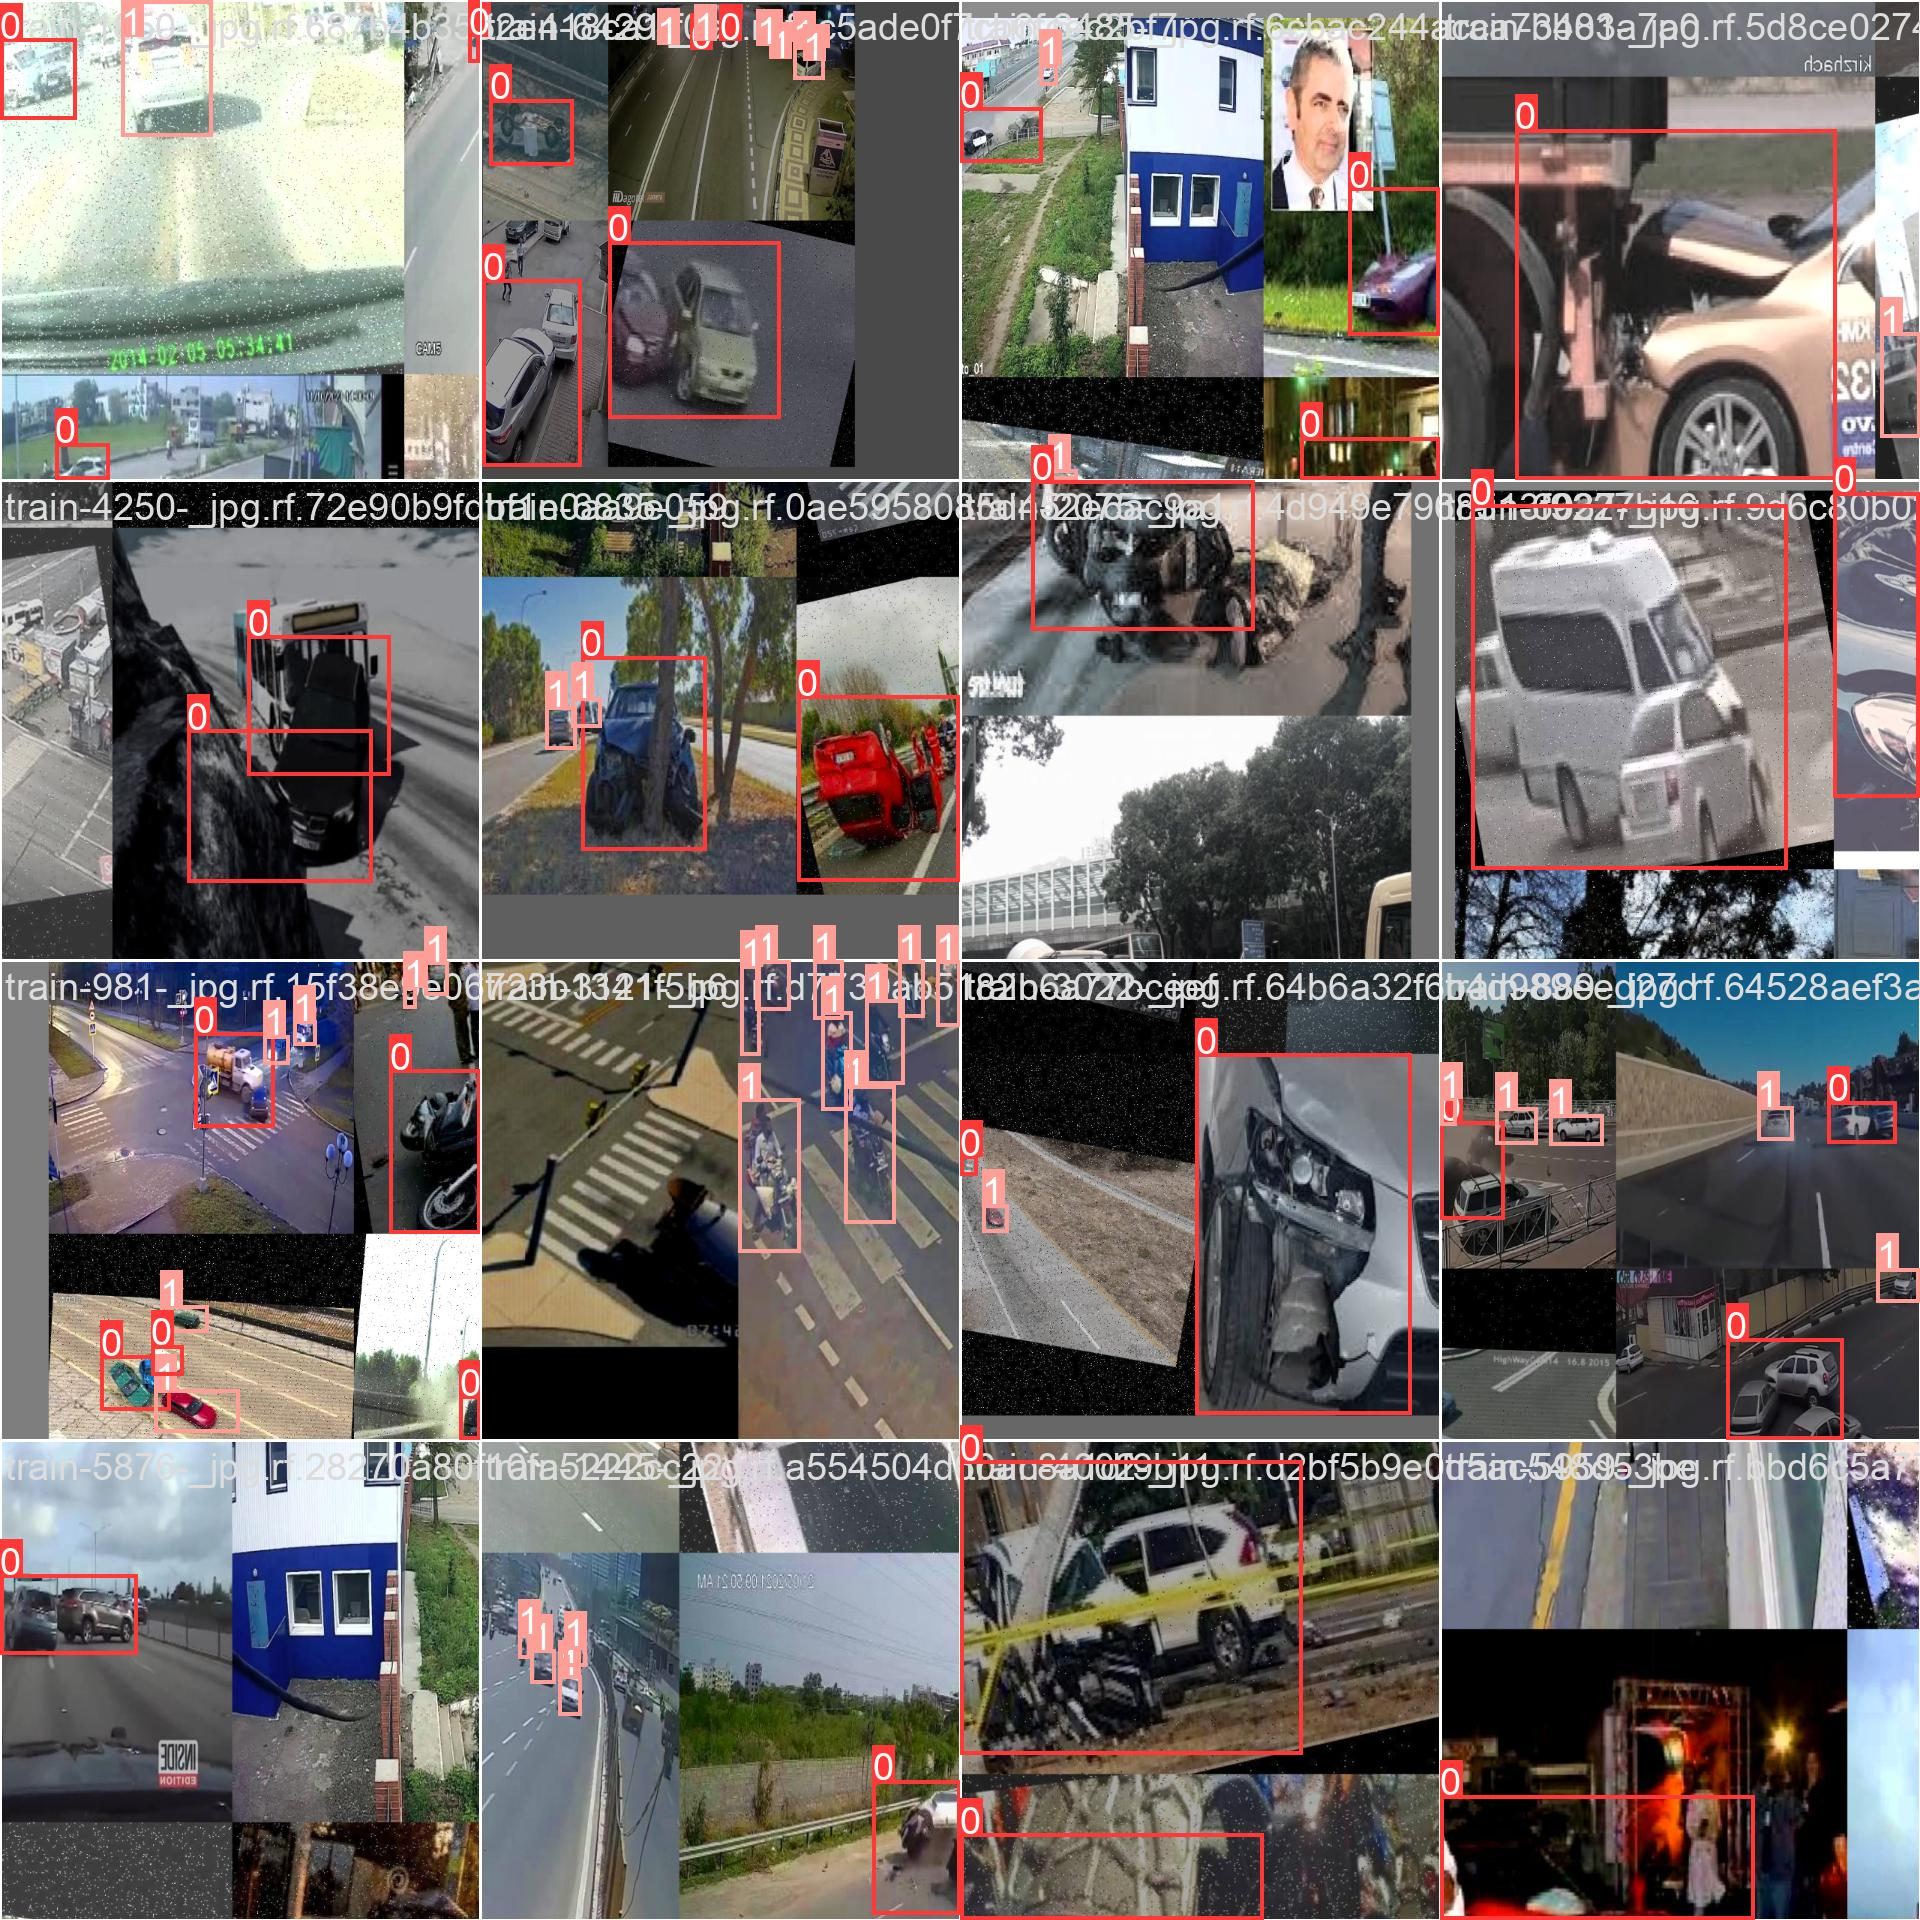

In [13]:
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='./runs/train/yolov5s_results2/train_batch0.jpg', width=900)

In [14]:
%ls runs/

train/


In [15]:
%ls runs/train/yolov5s_results2/weights

best.pt  last.pt


In [16]:
pwd

'/teamspace/studios/this_studio/yolov5'

In [18]:
!python detect.py --weights runs/train/yolov5s_results2/weights/best.pt --img 640 --conf 0.5 --source ../Vehicle-Accident-Detection-3/test/images

detect: weights=['runs/train/yolov5s_results2/weights/best.pt'], source=../Vehicle-Accident-Detection-3/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA A10G, 22724MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
image 1/976 /teamspace/studios/this_studio/Vehicle-Accident-Detection-3/test/images/test-1-_jpg.rf.b38255773bb46e6ee1f5b51daee74f96.jpg: 640x640 3 Vehicles, 5.9ms
image 2/976 /teamspace/studios/this_studio/Vehicle-Accident-Detection-3/test/images/test-10-_jpg.rf.0cf555d3d8bd4505